# Task4-Stock Market Prediction using Numerical and Textual Analysis

### Problem Statement: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

### Datasource

* Textual (news) data- https://bit.ly/36fFPI6
* Historical stock prices- https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Textual Data

In [2]:
text_data = pd.read_csv("india-news-headlines.csv")

In [3]:
text_data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


### Load historical stock prices(numerical data)

In [42]:
stock_data = pd.read_csv("upload_DJIA_table.csv")

In [43]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [44]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


### Load news data

In [45]:
news = pd.read_csv("Combined_News_DJIA.csv")

In [46]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [47]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

### Data Cleaning

In [48]:
# To get the top 25 news we will create a list to combine the headline news
headlines = []
for row in range(0,len(news.index)):
  headlines.append(" ".join(str(x)for x in news.iloc[row,2:27]))

In [49]:
# now cleaning the combind headlines
import re  #to work with Regular operaions
clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [50]:
# now add clean headlines to the news data
news["Combined_News"] = clean_headlines

### Checking for Frequency 

In [52]:
#wordcloud library for frequency analysis

In [16]:
!pip install wordcloud

In [17]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [53]:
# checking any null values in news data
news.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [54]:
all_headlines = " ".join(news["Combined_News"].str.lower())

In [55]:
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)

### Visualization

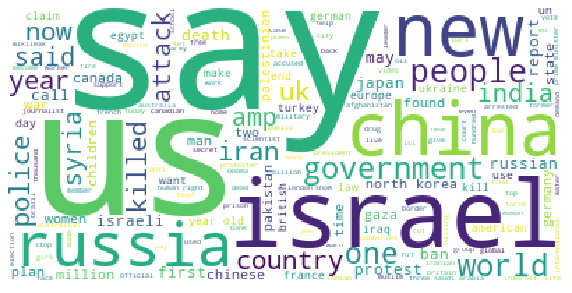

In [56]:
rcParams['figure.figsize'] = 10,20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

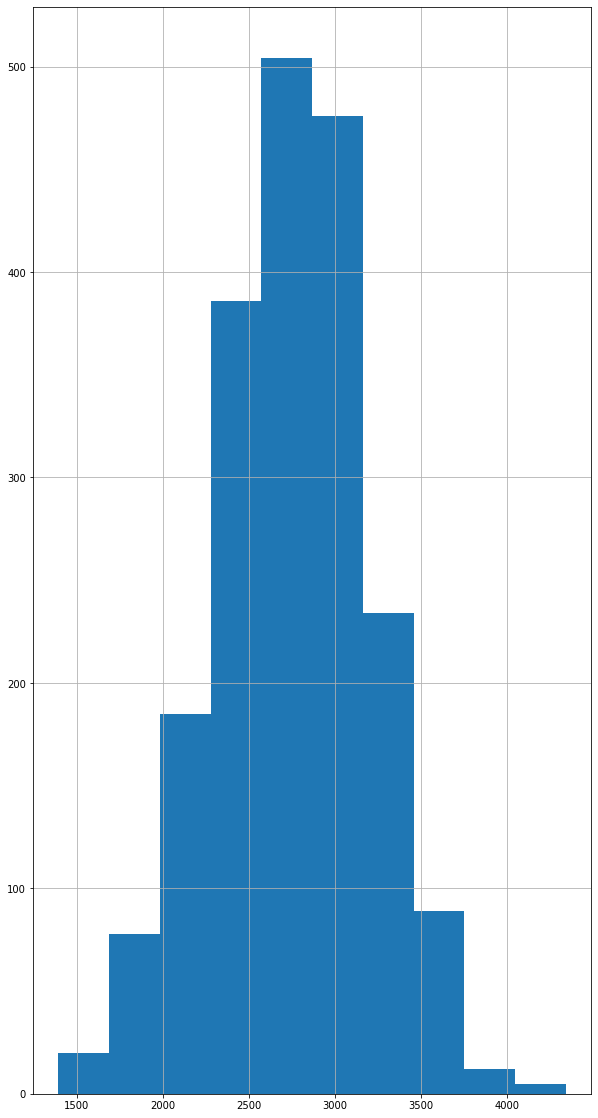

<Figure size 720x720 with 0 Axes>

In [141]:
# visualoizing textual data
news["Combined_News"].str.len().hist()
plt.figure(figsize=(10,10))
plt.show()

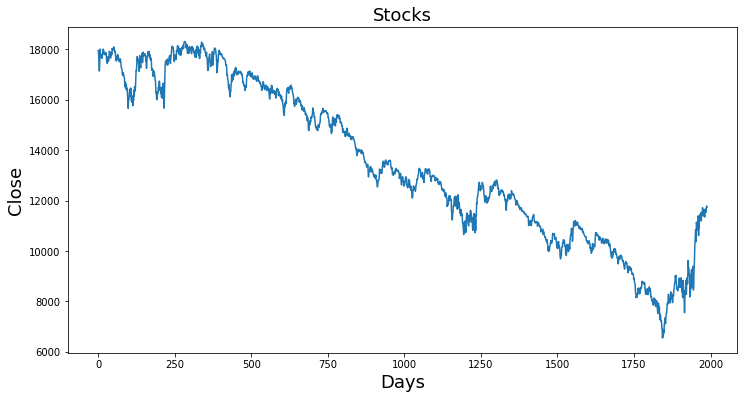

In [59]:
#visualizing numerical data
plt.figure(figsize=(12,6))
plt.title('Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(stock_data['Close'])
plt.show()

In [60]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [61]:
stock_data.fillna(0,inplace=True)

In [62]:
stock_data.shape

(1989, 7)

#### For the time series analysis of numeral data(stock_data), using ARIMA Model

### Auto-ARIMA Model

!pip install pmdarima

In [63]:
from pmdarima import auto_arima

In [64]:
train = stock_data[:783]
valid = stock_data[783:]

In [66]:
training = train["Close"]
validation = valid["Close"]

In [67]:
train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [68]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10318.091, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10080.787, Time=0.70 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10319.580, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9992.238, Time=2.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9990.515, Time=1.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=10078.792, Time=0.49 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.61 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9992.226, Time=2.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=12.86 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=9992.5

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

### Forecasting

In [77]:
forecast = model.predict(n_periods=1206)

In [78]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [79]:
forecast.head()

,Prediction
783,15376.551495
784,15380.694418
785,15322.269420
786,15222.403160
787,15192.362221


Root mean square

In [80]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

9417.371079914778

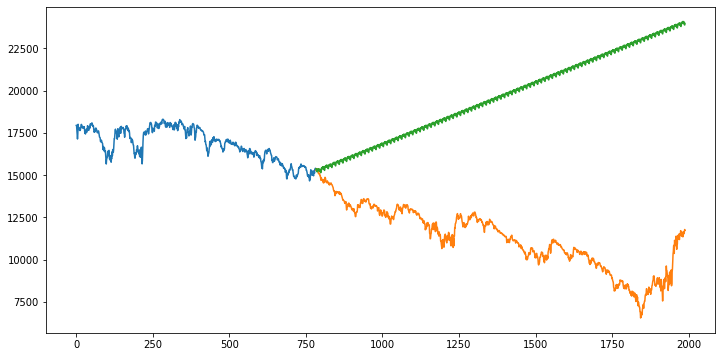

In [81]:
#plot
plt.figure(figsize=(12,6))

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

## Vader model for sentiment analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool

we use vader model for sentiment analysis of textual data(news_data)

In [82]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [84]:
!pip install textblob 

In [85]:
# importing required libraries
from textblob import TextBlob
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Prediction

#### For prediction merge both numerical and textual data

In [87]:
#performing innerjoin on news_data and stock_data
merge_data = news.merge(stock_data, how='inner', on='Date', left_index = True)
merge_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [88]:
merge_data.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
Open             0
High             0
Low              0
Close            0
Volume           0
Adj Close        0
dtype: int64

In [89]:
# Replace null values with 0
merge_data.fillna(0,inplace=True)

In [91]:
merge_data.isnull().sum().value_counts()

0    34
dtype: int64

In [92]:
# Reset Index
merge_data.reset_index(inplace=True,drop=True)
merge_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


### creating two functions
* subjectivity :subjectivity of the headlines (subjective or objective).
* polarity: wheather the statement is poistive(1) or negative(-1) and  0  is neutral.

In [93]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [94]:
# Create two new columns 'Subjectivity' & 'Polarity'
merge_data['Subjectivity'] =merge_data['Combined_News'].apply(getSubjectivity)
merge_data['Polarity'] =merge_data['Combined_News'].apply(getPolarity)

In [95]:
#Create function to get the sentiment scores (using Sentiment Intensity Analyzer)
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [96]:
#Get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merge_data['Combined_News'])):
  SIA = getSIA(merge_data['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [97]:
#Store the sentiment scores in the data frame
merge_data['Compound'] =compound
merge_data['Negative'] =neg
merge_data['Neutral'] =neu
merge_data['Positive'] = pos

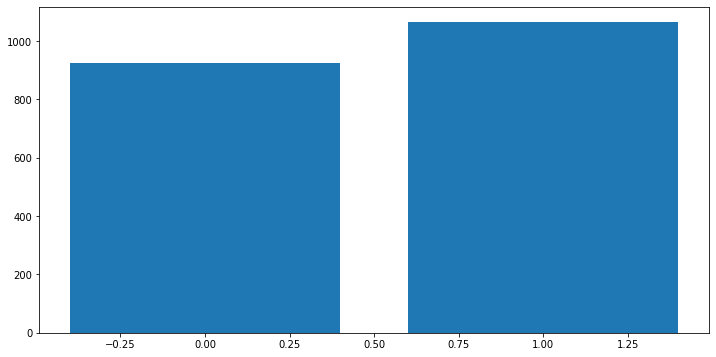

In [101]:
# visualizing
plt.figure(figsize=(12,6))
plt.bar(merge_data.Label.value_counts().index,
        merge_data.Label.value_counts())
plt.show()

In [103]:
merge_data.shape

(1989, 40)

In [106]:
merge_data['Subjectivity']

0       0.267549
1       0.374806
2       0.536234
3       0.364021
4       0.375099
          ...   
1984    0.352311
1985    0.352649
1986    0.389617
1987    0.382566
1988    0.320261
Name: Subjectivity, Length: 1989, dtype: float64

In [107]:
merge_data['Polarity']

0      -0.048568
1       0.121956
2      -0.044302
3       0.011398
4       0.040677
          ...   
1984   -0.014015
1985    0.046560
1986    0.052622
1987    0.011243
1988   -0.035458
Name: Polarity, Length: 1989, dtype: float64

In [108]:
#Create a list of columns
columns_list = [ 'Open',  'High', 'Low','Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive','Label']
df = merge_data[columns_list]
df.head()

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.724,0.041,0
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.721,0.089,1
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.816,0.056,0
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.788,0.066,0
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.717,0.094,1


### Split the dataset into train and test data

In [109]:
#Create the feature data set
X =df.drop('Label', axis=1)

#Create the target data set
y =df['Label']

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1989 non-null   float64
 1   High          1989 non-null   float64
 2   Low           1989 non-null   float64
 3   Volume        1989 non-null   int64  
 4   Subjectivity  1989 non-null   float64
 5   Polarity      1989 non-null   float64
 6   Compound      1989 non-null   float64
 7   Negative      1989 non-null   float64
 8   Neutral       1989 non-null   float64
 9   Positive      1989 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 155.5 KB


In [114]:
y.shape

(1989,)

In [116]:
from sklearn.model_selection import train_test_split
#Spliting the data into training 80% and 20% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify=y)

## DecisionTreeClassifier model

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt = DecisionTreeClassifier().fit(x_train, y_train)

In [120]:
#Checking the model on the training data
print( dt.score(x_train, y_train))

1.0


In [121]:
#Check the model on the test data
print( dt.score(x_test, y_test))

0.542713567839196


In [122]:
#predictions
dt_prediction = dt.predict(x_test)
print( dt_prediction )

[0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1]


In [124]:
from sklearn.metrics import classification_report,confusion_matrix
# models metrics
print( classification_report(y_test, dt_prediction) )

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       185
           1       0.57      0.60      0.58       213

    accuracy                           0.54       398
   macro avg       0.54      0.54      0.54       398
weighted avg       0.54      0.54      0.54       398



## SVM Classifier Model

In [125]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
y_pred = svclassifier.predict(x_test)

In [129]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Confusion matrix
 [[  3 182]
 [  4 209]]

Classification Report
               precision    recall  f1-score   support

           0       0.43      0.02      0.03       185
           1       0.53      0.98      0.69       213

    accuracy                           0.53       398
   macro avg       0.48      0.50      0.36       398
weighted avg       0.49      0.53      0.38       398



## RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 

In [132]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Confusion matrix
 [[ 39 146]
 [  9 204]]

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.21      0.33       185
           1       0.58      0.96      0.72       213

    accuracy                           0.61       398
   macro avg       0.70      0.58      0.53       398
weighted avg       0.69      0.61      0.54       398



## Linear Discriminant Analysis

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [135]:
model = lda().fit(x_train, y_train)

In [137]:
# Model prediction
pred = model.predict(x_test)


In [138]:
print("Confusion matrix\n",confusion_matrix(y_test,pred))
print("\nClassification Report\n",classification_report(y_test,pred))

Confusion matrix
 [[156  29]
 [ 31 182]]

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       185
           1       0.86      0.85      0.86       213

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



### Conclusion

From the above 4 models we can see the accuracy scores as
* DecisionTreeClassifier- 54% 
* SVM Classifier- 53%
* RandomForestClassifier- 61%
* Linear Discriminant Analysis- 85%
LDA model shows the high accuracy

## Thank you